In [4]:
from pyke import KeplerTargetPixelFile
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

In [19]:
from oktopus import UniformPrior, JointPrior

In [25]:
from pyke import PRFPhotometry, SceneModel
from pyke.utils import KeplerQualityFlags

In [26]:
tpf = KeplerTargetPixelFile('https://archive.stsci.edu/missions/k2/target_pixel_files/c12/246100000/99000/ktwo246199087-c12_lpd-targ.fits.gz',
                            quality_mask=KeplerQualityFlags.HARDEST_BITMASK)

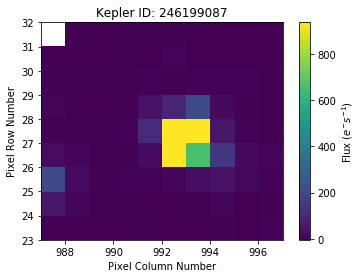

In [27]:
tpf.plot()

In [28]:
prf = tpf.get_prf_model()

In [73]:
prior_column = UniformPrior(lb=990, ub=996, name='column')
prior_row = UniformPrior(lb=25, ub=30, name='row')
prior_flux = UniformPrior(lb=4e3, ub=2e4, name='flux')
prior_bkg = UniformPrior(lb=1, ub=2e3, name='bkg')

In [59]:
prior = JointPrior(prior_flux, prior_column, prior_row, prior_bkg)

In [60]:
scene = SceneModel(prfs=[prf])

In [61]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [62]:
results = phot.fit(tpf.flux + tpf.flux_bkg)

  0%|          | 0/3379 [00:00<?, ?it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
 35%|███▍      | 1176/3379 [00:44<01:23, 26.34it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
100%|██████████| 3379/3379 [02:12<00:00, 25.41it/s]


In [63]:
flux = results[:, 0]
col = results[:, 1]
row = results[:, 2]
bkg = results[:, 3]

(5000, 6000)

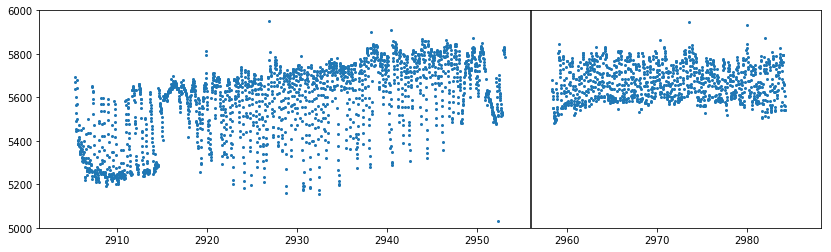

In [111]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, flux, 'o', markersize=2)
plt.vlines(2956, ymin=5000, ymax=6000)
plt.ylim(5000, 6000)

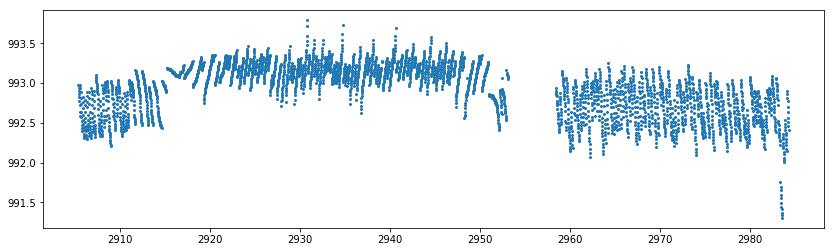

In [65]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, col, 'o', markersize=2)

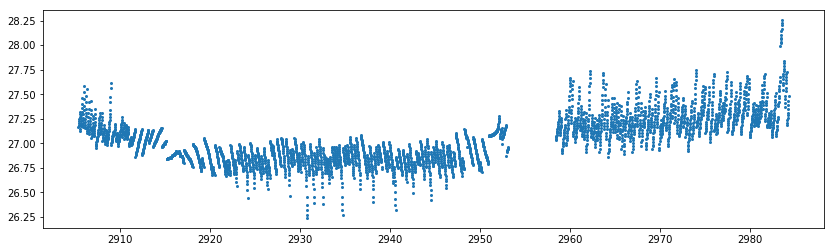

In [68]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, row, 'o', markersize=2)

(251.22886310415029, 982.00661752378915)

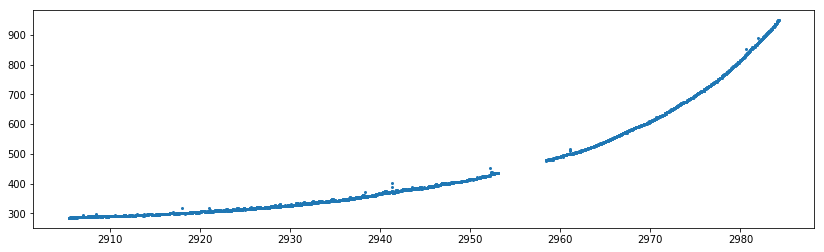

In [70]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, bkg, 'o', markersize=2)
plt.ylim()

In [75]:
def _rotate_centroids(centroid_col, centroid_row):
    centroids = np.array([centroid_col, centroid_row])
    _, eig_vec = linalg.eigh(np.cov(centroids))
    return np.dot(eig_vec, centroids)

In [112]:
q = tpf.time > 2956

In [113]:
tpf.time[q]

array([ 2958.37677167,  2958.3972033 ,  2958.41763482, ...,  2984.22281491,
        2984.24324676,  2984.2636787 ])

In [ ]:
plt.figure(figsize=[10, 10])
plt.scatter(col[q], row[q], marker='+', s=2)
plt.scatter(col[~q], row[~q], marker='+', s=2)